#problem 1
what to learn:the transaction information of the client
what to predict:the repayment abilities
submission file:for each SK_ID_CURR in the test set,you must predict a probability for the TARGET  variable.the file should contain a header and 
havethe following format:
SK_ID_CURR,TARGET
100001,0.1
100005,O.9
100013.0.2
etc.
What kind of index value will the submitted iterm be evaluated? submissions are evaluated on area under the ROC curve between
the predicted probability and the observed target.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('application_train.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.shape


(307511, 122)

In [7]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
data = pd.concat([total,percent], axis=1, keys=['Total','percentage'])
data

,Total,percentage
COMMONAREA_MEDI,214865,0.698723
COMMONAREA_AVG,214865,0.698723
COMMONAREA_MODE,214865,0.698723
NONLIVINGAPARTMENTS_MODE,213514,0.694330
NONLIVINGAPARTMENTS_AVG,213514,0.694330
...,...,...
NAME_HOUSING_TYPE,0,0.000000
NAME_FAMILY_STATUS,0,0.000000
NAME_EDUCATION_TYPE,0,0.000000
NAME_INCOME_TYPE,0,0.000000


In [8]:
features = data[data.percentage < 0.1]
features

,Total,percentage
NAME_TYPE_SUITE,1292,0.004201
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.003320
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.003320
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.003320
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.003320
...,...,...
NAME_HOUSING_TYPE,0,0.000000
NAME_FAMILY_STATUS,0,0.000000
NAME_EDUCATION_TYPE,0,0.000000
NAME_INCOME_TYPE,0,0.000000


In [9]:
features.index

Index(['NAME_TYPE_SUITE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE',
       'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE',
       'CNT_CHILDREN', 'FLAG_DOCUMENT_8', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_OWN_REALTY', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_12', 'AMT_CREDIT',
       'AMT_INCOME_TOTAL', 'FLAG_PHONE', 'LIVE_CITY_NOT_WORK_CITY',
       'REG_CITY_NOT_WORK_CITY', 'TARGET', 'REG_CITY_NOT_LIVE_CITY',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_WORK_

In [10]:
df1 = df[features.index]
df1.head()

,NAME_TYPE_SUITE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,...,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,SK_ID_CURR
0,Unaccompanied,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0,...,-2120,-3648.0,-637,-9461,0.018801,House / apartment,Single / not married,Secondary / secondary special,Working,100002
1,Family,1.0,0.0,1.0,0.0,0.622246,1129500.0,35698.5,2.0,-828.0,...,-291,-1186.0,-1188,-16765,0.003541,House / apartment,Married,Higher education,State servant,100003
2,Unaccompanied,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0,...,-2531,-4260.0,-225,-19046,0.010032,House / apartment,Single / not married,Secondary / secondary special,Working,100004
3,Unaccompanied,2.0,0.0,2.0,0.0,0.650442,297000.0,29686.5,2.0,-617.0,...,-2437,-9833.0,-3039,-19005,0.008019,House / apartment,Civil marriage,Secondary / secondary special,Working,100006
4,Unaccompanied,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0,...,-3458,-4311.0,-3038,-19932,0.028663,House / apartment,Single / not married,Secondary / secondary special,Working,100007


<function matplotlib.pyplot.show(close=None, block=None)>

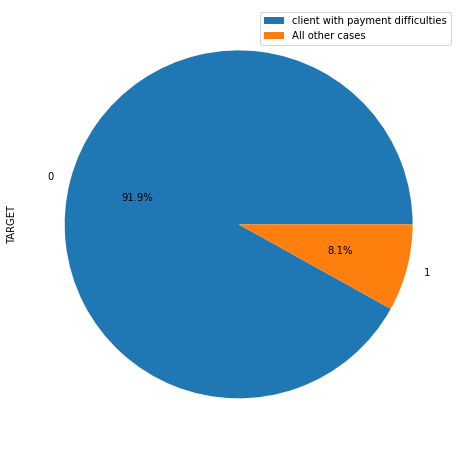

In [11]:
import matplotlib.pyplot as plt 
tg = df["TARGET"].value_counts()
plt.subplots(figsize=(12,8))
pie_target = tg.plot.pie(autopct="%.1f%%")
pie_target.legend(loc=1, labels={'client with payment difficulties': 0, 'All other cases': 1})
plt.show

In [12]:
def dummy_variable_all(df, sort_freqeunce=True, dropna=True, map_show=False, skip_column=[]):
    for column_name in df:
        if np.dtype(df[column_name]) == 'o' and column_name not in skip_column:
            if sort_frequence:
                unique_value = df[column_name].value_counts(dropna=dropna).sort_values().index
        else:
            unique_value = df[column_name].value_counts(dropna=dropna).sort_values().index
        name_map = {}
        for i, value in enumerate(unique_value):
            name_map[value] = i#
        if map_show:
            print('column_name :', column_name)
            print('replace :',name_map)
        df[column_name] = df[column_name].map(name_map)
    return df

In [13]:
df2 = dummy_variable_all(df.copy(), dropna=False, map_show=True)
df2.fillna(df2.median(), inplace=True)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



column_name : TARGET
replace : {1: 0, 0: 1}
column_name : NAME_CONTRACT_TYPE
replace : {'Revolving loans': 0, 'Cash loans': 1}
column_name : CODE_GENDER
replace : {'XNA': 0, 'M': 1, 'F': 2}
column_name : FLAG_OWN_CAR
replace : {'Y': 0, 'N': 1}
column_name : FLAG_OWN_REALTY
replace : {'N': 0, 'Y': 1}
column_name : CNT_CHILDREN
replace : {11: 0, 8: 1, 9: 2, 12: 3, 10: 4, 19: 5, 14: 6, 7: 7, 6: 8, 5: 9, 4: 10, 3: 11, 2: 12, 1: 13, 0: 14}
column_name : AMT_INCOME_TOTAL
replace : {114457.5: 0, 196245.0: 1, 190611.0: 2, 73368.0: 3, 1530000.0: 4, 163260.0: 5, 329400.0: 6, 142992.0: 7, 248850.0: 8, 341100.0: 9, 193684.5: 10, 147955.5: 11, 173520.0: 12, 129748.5: 13, 317088.0: 14, 156141.0: 15, 67567.5: 16, 141457.5: 17, 105610.5: 18, 66087.0: 19, 150385.5: 20, 87007.5: 21, 196434.0: 22, 52515.0: 23, 103149.0: 24, 31531.5: 25, 128340.0: 26, 46566.0: 27, 185985.0: 28, 100507.5: 29, 99031.5: 30, 266089.5: 31, 294448.5: 32, 51642.0: 33, 128695.5: 34, 52582.5: 35, 105840.0: 36, 374220.0: 37, 133875

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



column_name : EXT_SOURCE_3
replace : {0.0432265239224614: 0, 0.01394846558484: 1, 0.0219512924659906: 2, 0.029283298591354: 3, 0.0182663270292142: 4, 0.0232248706800152: 5, 0.0186584216525425: 6, 0.017506245542977: 7, 0.0269207441228222: 8, 0.8444930838153043: 9, 0.018924392893755: 10, 0.0242271193752195: 11, 0.0290789696889339: 12, 0.0181374344751957: 13, 0.020025951133263: 14, 0.023061811111294: 15, 0.0127159238587686: 16, 0.0165409481550964: 17, 0.8724558162271476: 18, 0.0145563649297115: 19, 0.0160781171456365: 20, 0.0214915157350364: 21, 0.0252715002135269: 22, 0.0286744530870526: 23, 0.0282753998252686: 24, 0.0240571964235513: 25, 0.0170168719756039: 26, 0.0141482655182073: 27, 0.0113457194348374: 28, 0.0203110127062034: 29, 0.8960095494948396: 30, 0.0249185898393762: 31, 0.8876642018413868: 32, 0.8642120024718819: 33, 0.8795062158892447: 34, 0.8581775591924884: 35, 0.0194675367994041: 36, 0.8491704167593942: 37, 0.0204550298661585: 38, 0.0235543731451908: 39, 0.0201679886469343:

In [14]:
pd.set_option('display.max_columns', None)
df2

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,0,1,1,1,1,14,2541,4500,8918,891,7,7,4,4,5,61,3020,11383,13897,2003,62,1,1,1,1,0,1,17,16,2,2,5,23,1,1,1,1,1,1,57,64088,70906,360,2325,3006,249,112,3108,256,283,397,298,3209,1854,4711,385,3289,746,3070,185,117,3052,25,28,19,18,3204,722,4707,166,3326,1134,3015,209,114,3101,45,44,43,40,3183,1083,4800,213,3322,3,2,4753,5,2,31,8,31,7,2635,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,5,9,9,24,11,24
1,76876,1,1,2,1,0,14,2539,5474,13435,955,6,4,3,5,5,6,9147,11745,14338,2128,62,1,1,1,1,0,1,15,17,0,0,4,22,1,1,1,1,1,1,50,112979,116665,814,2173,3437,278,141,2538,255,280,389,290,3268,1743,5010,384,3173,703,3569,214,146,2657,24,25,11,10,3219,619,5131,166,3326,972,3447,238,143,2530,44,41,35,32,3381,951,4891,212,3215,3,2,4953,4,2,32,10,32,9,3059,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,5,9,9,24,11,25
2,17,1,0,1,0,1,14,2540,5593,13670,994,7,7,4,4,5,55,11578,12531,14491,2374,33,1,1,0,1,0,1,17,16,2,2,4,18,1,1,1,1,1,1,51,114584,116740,716,2339,3780,285,149,3181,257,285,403,305,3527,1868,5199,386,3290,760,3841,221,154,3128,26,30,25,25,3563,736,5301,167,3327,1148,3772,245,151,3202,46,46,49,47,3560,1097,5281,214,3323,4,3,5116,7,1,33,10,33,9,2937,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,5,9,9,24,11,25
3,16,1,1,2,1,1,14,2547,3475,6417,926,7,7,4,3,5,31,4578,10402,5777,3812,62,1,1,1,1,1,1,17,17,2,2,5,14,1,1,1,1,1,1,57,114584,104204,814,2339,3780,285,149,3181,257,285,403,305,3527,1868,5199,386,3290,760,3841,221,154,3128,26,30,25,25,3563,736,5301,167,3327,1148,3772,245,151,3202,46,46,49,47,3560,1097,5281,214,3323,4,3,5116,7,1,31,10,31,9,3269,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4,8,8,23,10,22
4,7,1,1,1,1,1,14,2533,4804,13539,822,7,7,4,4,5,74,11408,9839,13498,4369,62,1,1,1,1,1,1,15,16,2,2,3,22,1,1,1,1,0,0,4,114584,3660,814,2339,3780,285,149,3181,257,285,403,305,3527,1868,5199,386,3290,760,3841,221,

In [15]:
df2.dtypes.value_counts()

int64    122
dtype: int64

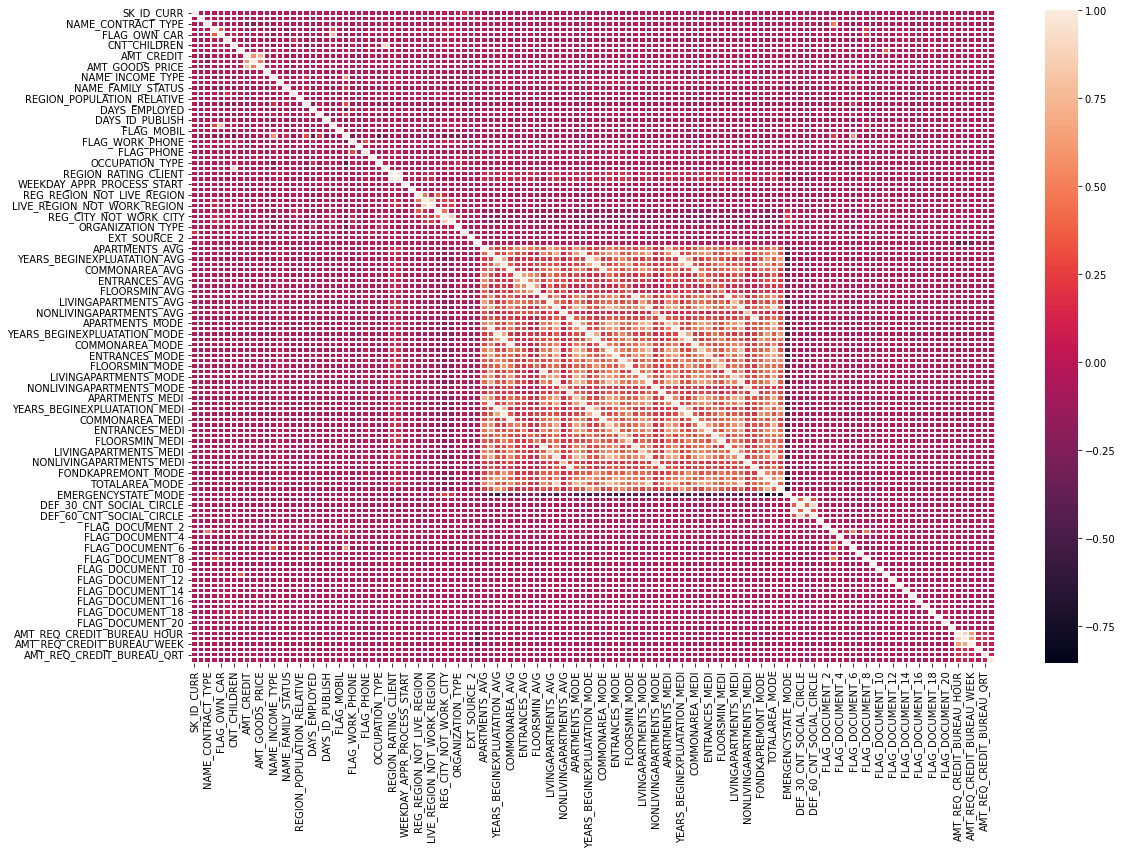

In [16]:
corr = df2.corr()
plt.subplots(figsize=(18, 12))
sns.heatmap(corr, linewidth=0.1)
plt.show()

In [17]:
target_corr = abs(corr['TARGET'].copy().drop(index=['TARGET'])).sort_values(ascending=False)
target_corr                  

EXT_SOURCE_3              0.093578
EXT_SOURCE_2              0.081668
NAME_INCOME_TYPE          0.059979
CODE_GENDER               0.054692
REG_CITY_NOT_WORK_CITY    0.050994
                            ...   
FLAG_DOCUMENT_12          0.000756
FLAG_MOBIL                0.000534
FLAG_CONT_MOBILE          0.000370
FLAG_DOCUMENT_5           0.000316
FLAG_DOCUMENT_20          0.000215
Name: TARGET, Length: 121, dtype: float64

In [18]:
x = df2[df2.columns.copy().drop('TARGET')].values
y = df2['TARGET'].values
print(x.shape, y.shape)

(307511, 121) (307511,)


In [19]:
from sklearn.feature_selection import SelectKBest, f_classif
x_select = SelectKBest(f_classif, k=2).fit_transform(x, y)
print(x_select)

[[ 70906    360]
 [116665    814]
 [116740    716]
 ...
 [ 82919    447]
 [108908    667]
 [ 94291    305]]


In [20]:
selected_features = []
for i in df2.columns:
    if all(df2.loc[:, i] == x_select[:, 0]) or all(df2.loc[:, i] == x_select[:, 1]):
        selected_features.append(i)
print(selected_features)

['EXT_SOURCE_2', 'EXT_SOURCE_3']


In [21]:
objects = df1.select_dtypes(include=[object])
objects

,NAME_TYPE_SUITE,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE
0,Unaccompanied,Cash loans,M,N,Y,WEDNESDAY,Business Entity Type 3,House / apartment,Single / not married,Secondary / secondary special,Working
1,Family,Cash loans,F,N,N,MONDAY,School,House / apartment,Married,Higher education,State servant
2,Unaccompanied,Revolving loans,M,Y,Y,MONDAY,Government,House / apartment,Single / not married,Secondary / secondary special,Working
3,Unaccompanied,Cash loans,F,N,Y,WEDNESDAY,Business Entity Type 3,House / apartment,Civil marriage,Secondary / secondary special,Working
4,Unaccompanied,Cash loans,M,N,Y,THURSDAY,Religion,House / apartment,Single / not married,Secondary / secondary special,Working
...,...,...,...,...,...,...,...,...,...,...,...
307506,Unaccompanied,Cash loans,M,N,N,THURSDAY,Services,With parents,Separated,Secondary / secondary special,Working
307507,Unaccompanied,Cash loans,F,N,Y,MONDAY,XNA,House / apartment,Widow,Secondary / secondary special,Pensioner
307508,Unaccompanied,Cash loans,F,N,Y,THURSDAY,School,House / apartment,Separated,Higher education,Working
307509,Unaccompanied,Cash loans,F,N,Y,WEDNESDAY,Business Entity Type 1,House / apartment,Married,Secondary / secondary special,Commercial associate


In [22]:
objects.isna().sum()

NAME_TYPE_SUITE               1292
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
WEEKDAY_APPR_PROCESS_START       0
ORGANIZATION_TYPE                0
NAME_HOUSING_TYPE                0
NAME_FAMILY_STATUS               0
NAME_EDUCATION_TYPE              0
NAME_INCOME_TYPE                 0
dtype: int64

In [23]:
df1['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_select, y, train_size=0.75, test_size=0.25)#
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(230633, 2) (76878, 2) (230633,) (76878,)


In [ ]:

scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
y_train_scaled = scaler.transform(y_train)



In [27]:
print(x_train)
print(x_train_scaled)
print(x_test)
print(x_train_scaled)

[[118624    619]
 [102225    783]
 [113477    787]
 ...
 [101580    315]
 [ 97353    746]
 [ 49564    588]]
[[ 1.10085141 -0.35199932]
 [ 0.59074817  0.7784978 ]
 [ 0.9407501   0.80607091]
 ...
 [ 0.57068496 -2.44755498]
 [ 0.43920094  0.52344662]
 [-1.04731188 -0.56569085]]
[[116995    348]
 [117932    794]
 [110549    491]
 ...
 [ 56151    619]
 [ 19280    571]
 [ 79317    814]]
[[ 1.10085141 -0.35199932]
 [ 0.59074817  0.7784978 ]
 [ 0.9407501   0.80607091]
 ...
 [ 0.57068496 -2.44755498]
 [ 0.43920094  0.52344662]
 [-1.04731188 -0.56569085]]


In [31]:
from sklearn.metrics import *
def evaluation(test, predict):
    acc_score = accuracy_score(test, predict)
    prec_score = precision_score(test,predict)
    rec_score = recall_score(test,predict)
    f_score = f1_score(test,predict)
    conf_matrix = confusion_matrix(test,predict)
    print('Accuracy : {:,3f}'.format(acc_score))
    print('Precision: {:.3f}'.format(prec_score))
    print('Recall   : {:.3f}'.format(rec_score))
    print('F        : {:.3f}'.format(f_score))
    print('confusion matrix:\n', conf_matrix)
    

In [29]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train_scaled, y_train)
predict_3 = neigh.predict(x_test_scaled)
evaluation(y_test, predict_3)

NameError: name 'x_test_scaled' is not defined

In [30]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(x_train_scaled, y_train)
dtree_predict = dtree.predict(x_test_scaled)
evaluation(y_test, dtree_predict)

NameError: name 'x_test_scaled' is not defined

In [ ]:
neigh_prob = neigh.predict_prob(X_test_scaled)
print("KNeighbors Classifier probas:")
print(niegh_prob)

dtree_prob = dtree.predict_prob(x_test_scaled)
print(dtree_prob)

r_forest_prob = dtree.predict_proba(x_test_scaled)
print("Random Forest probas:")
print(r_forest_prob)

In [ ]:
average_prob = (neigh_prob + dree_prob + r_forest_prob)/3
average_prob